In [1]:
import os
os.chdir("C:/Users/Rasa/home/EEGdenoiseNet/code/benchmark_networks/")

import numpy as np
import time
from data_prepare import prepare_data
import matplotlib.pyplot as plt

np.random.seed(seed=7)

os.chdir("C:/Users/Rasa/home/EEGdenoiseNet/")

In [2]:
noise_type = 'EOG'
file_location = 'data/'
EEG_all = np.load(file_location + 'EEG_all_epochs.npy')                              
noise_all = np.load(file_location + 'EOG_all_epochs.npy')

In [3]:
noise_train, EEG_train, noise_val, EEG_val, noise_test, EEG_test, test_std_VALUE = prepare_data(EEG_all = EEG_all, noise_all = noise_all, combin_num = 10, train_per = 0.8, noise_type = noise_type)

EEG segments after drop:  3400
(27200,)
training data prepared (27200, 512) (27200, 512)
validation data prepared, validation data shape:  (3400, 512) (3400, 512)
test data prepared, test data shape:  (3400, 512) (3400, 512)


In [4]:
def plot_example_dataset(EEG, noiseEEG, data_type):
    fig, axs = plt.subplots(3, 3, figsize=(12, 5))
    axs = axs.ravel()

    y_min = min([min(np.concatenate([EEG[sample_index], noiseEEG[sample_index]])) for sample_index in range(9)])-0.5
    y_max = max([max(np.concatenate([EEG[sample_index], noiseEEG[sample_index]])) for sample_index in range(9)])+0.5

    for sample_index in range(9):

        axs[sample_index].plot(EEG[sample_index], label='Clean signal')
        axs[sample_index].plot(noiseEEG[sample_index], label='Noisy signal', c="r", alpha=0.7)
        axs[sample_index].grid()
        axs[sample_index].set_ylim(y_min, y_max)

    plt.suptitle(f"Example {data_type} data", y=0.87)
    axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
    plt.tight_layout()
    plt.show()

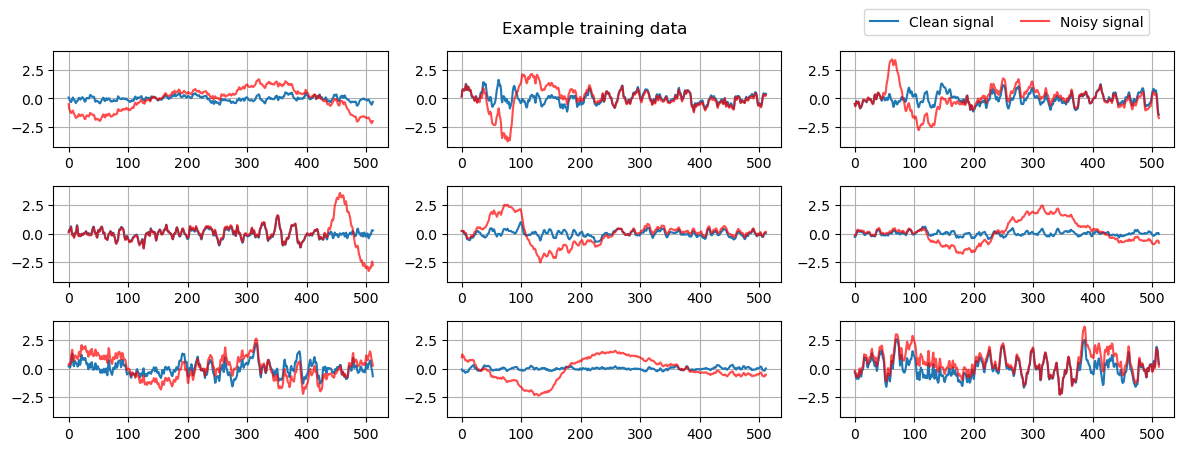

In [5]:
plot_example_dataset(EEG_train, noise_train, data_type="training")

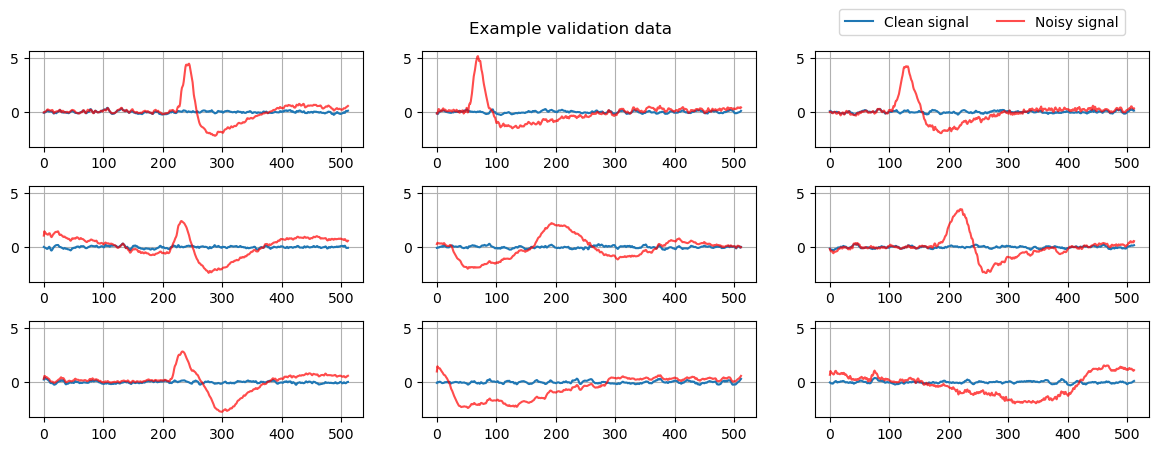

In [6]:
plot_example_dataset(EEG_val, noise_val, data_type="validation")

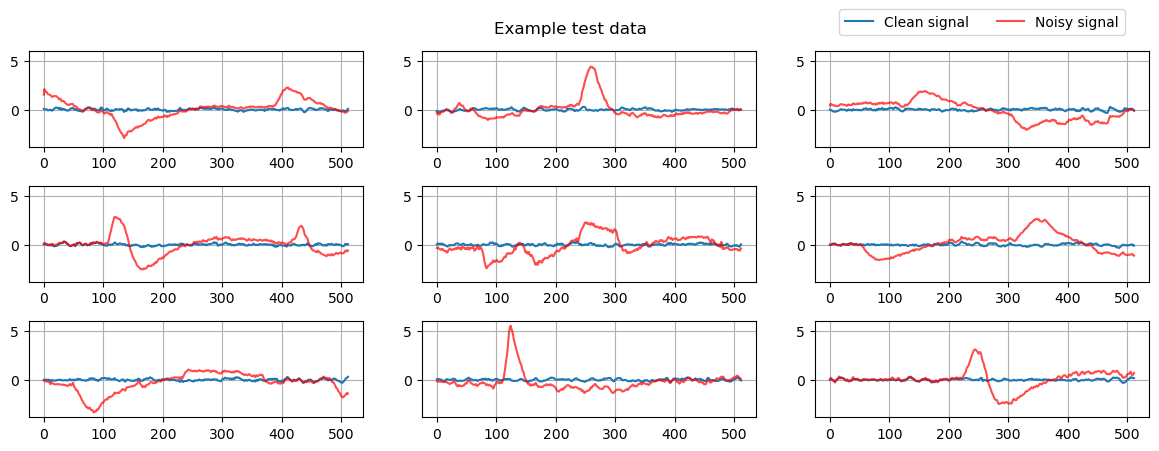

In [7]:
plot_example_dataset(EEG_test, noise_test, data_type="test")

In [8]:
# os.chdir("C:/Users/rassa/home/bakis/RNN_model/data/")

# np.save('Train_clean.npy', EEG_train)
# np.save('Train_noisy.npy', noiseEEG_train)

# np.save('Valid_clean.npy', EEG_val)
# np.save('Valid_noisy.npy', noiseEEG_val)

# np.save('Test_clean.npy', EEG_test)
# np.save('Test_noisy.npy', noiseEEG_test)

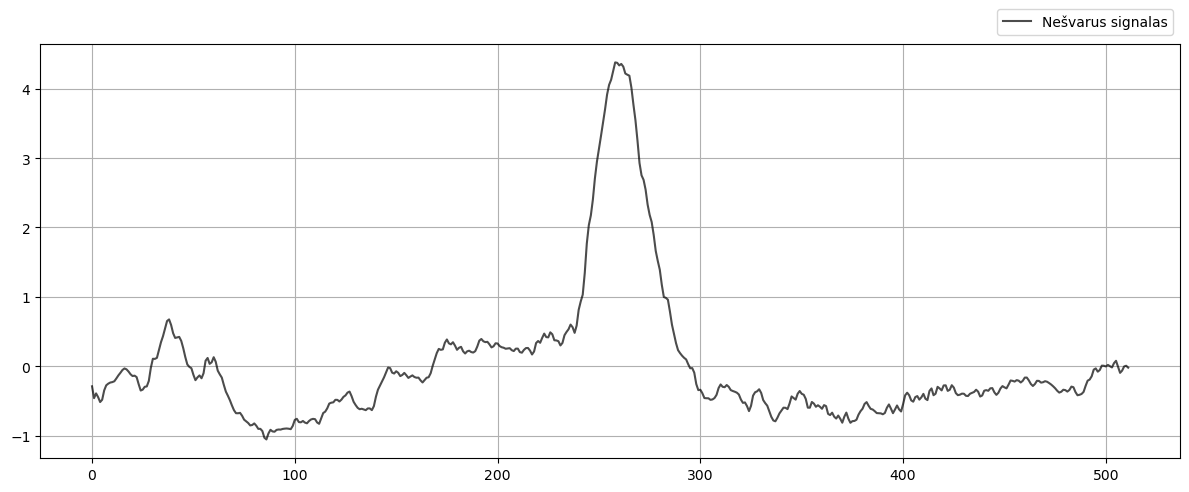

In [36]:
fig = plt.figure(figsize=(12, 5))

plt.plot(
    noise_test[1], label="Nešvarus signalas", c="black", alpha=0.7
)
plt.grid()

plt.legend(loc="upper right", bbox_to_anchor=(1, 1.1), ncol=2)
plt.tight_layout()
plt.show()

In [10]:
import os
os.chdir("C:/Users/Rasa/home/bakis/")

In [11]:
import tensorflow as tf
model = tf.keras.models.load_model("RNN_model/models/b20-LRsch.keras")

In [19]:
data = noise_test[1].copy()

In [21]:
data.shape

(512,)

In [26]:
data = data.reshape((1, 512, 1))

In [27]:
prediction = model.predict(data)

1/1 [==============================] - 1s 1s/step


In [31]:
prediction = prediction.reshape((512, 1))

In [32]:
prediction.shape

(512, 1)

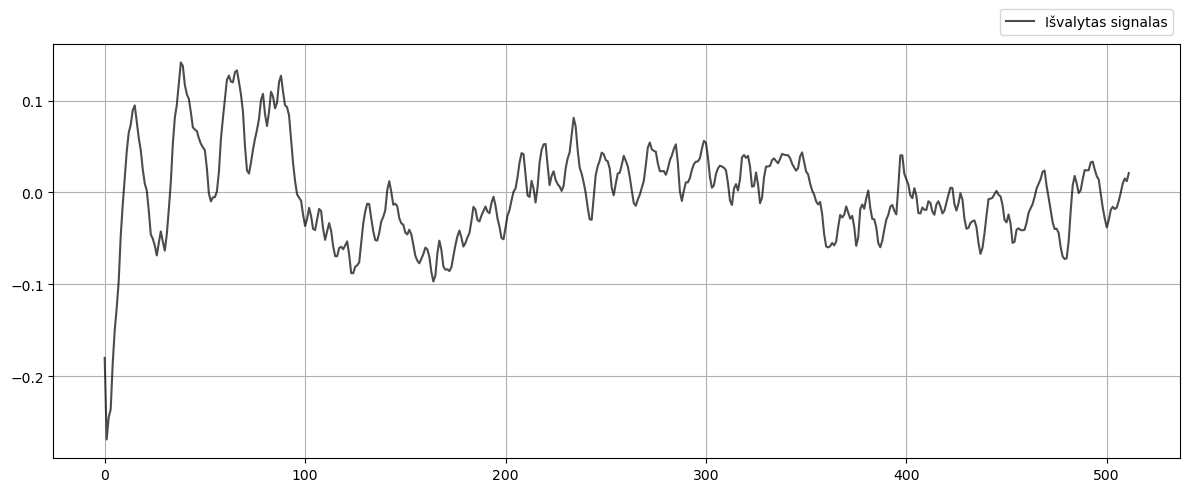

In [35]:
fig = plt.figure(figsize=(12, 5))

plt.plot(prediction, label="Išvalytas signalas", c="black", alpha=0.7)
plt.grid()

plt.legend(loc="upper right", bbox_to_anchor=(1, 1.1), ncol=2)
plt.tight_layout()
plt.show()